In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fminbound
from timeit import default_timer as timer

# Bellman operator

In [3]:
class Model:
    
    def __init__(self, α=0.4, β=0.96, δ=0.04):
        self.α, self.β, self.δ = α, β, δ
        self.grid = np.linspace(5, 20, 1000)
        self.η = 1-(δ*α/(1/β+δ-1))
        self.k_ss = (α/(1/β+δ-1))**(1/(1-α))
        self.c_ss = (self.k_ss)**α-δ*self.k_ss
        
    def budget_constraint(self, k, k_prime):
        α, β, δ = self.α, self.β, self.δ
        return k**α+(1-δ)*k-k_prime
    
    def utility_function(self, k, k_prime):
        α, β, δ = self.α, self.β, self.δ
        c=self.budget_constraint(k, k_prime)
        return np.log(c)
    
    def eta_consumption(self, k):
        η, α = self.η, self.α
        return η*k**α
        

def bellman_operator(mod, w, Tw=None, compute_policy=False, compute_consumption=False):
    α, β, δ = mod.α, mod.β, mod.δ
    U = mod.utility_function
    BC = mod.budget_constraint
    
    # linear approximation of w
    w_func = lambda x: np.interp(x, grid, w)
    
    if Tw is None:
        Tw = np.empty_like(w)
        
    if compute_policy:
        k_optims = np.empty_like(w)
    if compute_consumption:
        c_optims = np.empty_like(w)
        
    for i, k in enumerate(grid):
        def objective(k_prime):
            return -U(k, k_prime)-β*np.mean(w_func(k_prime))
        
        k_star = fminbound(objective, 5, k)
        c_star = BC(k, k_star)
        
        if compute_policy:
            k_optims[i]=k_star
        if compute_consumption:
            c_optims[i]=c_star
            
        Tw[i]=-objective(k_star)
  
    if compute_policy and compute_consumption:
        return Tw, k_optims, c_optims
    elif compute_policy:
        return Tw, k_optims
    elif compute_consumption:
        return Tw, c_optims
    else:
        return Tw

### Problem 1b)

steady state of capital: 14.126197356650485

steady state of consumption: 2.3190507327167915



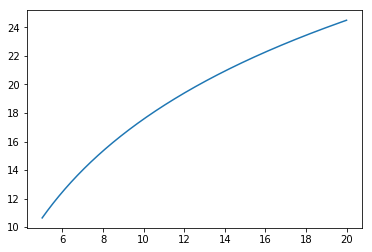

In [21]:
mod = Model()
β=mod.β

print('steady state of capital: {0}\n'.format(mod.k_ss))
print('steady state of consumption: {0}\n'.format(mod.c_ss))

w=0
for n in range(0,500):
    w0 = np.log(mod.eta_consumption(mod.grid))
    w+=w0*β**n

plt.plot(mod.grid, w)
plt.show()

loop stopped at iteration:  172

final error:  9.953740984336434e-05

elapsed time: 249.93597495077643


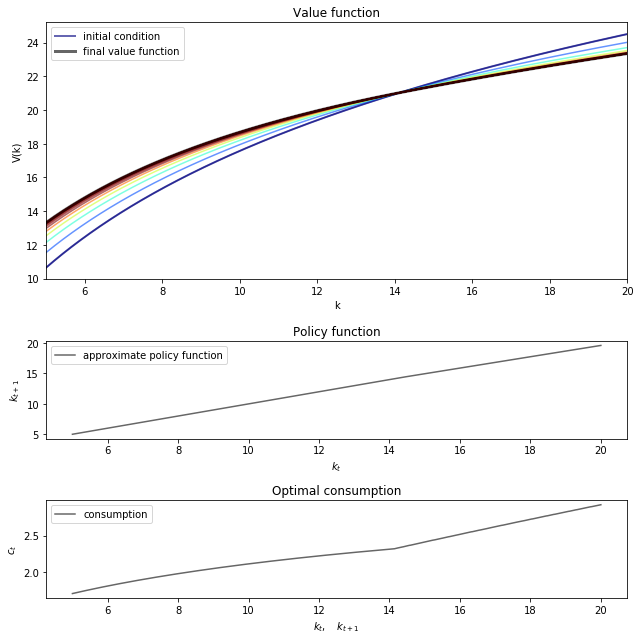

In [22]:
mod = Model()
grid=mod.grid

w=0
for n in range(0,500):
    w0 = np.log(mod.eta_consumption(mod.grid))
    w+=w0*β**n

max_iter = 250
           
fig = plt.figure(figsize=(9,9))
size = (4,1)
ax=plt.subplot2grid(size, (0,0), rowspan=2)
ax2=plt.subplot2grid(size, (2,0))
ax3=plt.subplot2grid(size, (3,0))
ax.set_xlim(np.min(grid), np.max(grid))

# VALUE FUNCTION
lb = 'initial condition'
ax.plot(grid, w, color=plt.cm.jet(0), lw=2, alpha=0.6, label=lb)

tol=0.0001
j=0
error=1
start = timer()
while j<max_iter and error>tol:
    w_new = bellman_operator(mod, w)
    error = np.max(np.abs(w_new-w))
    if j%10==0:
        ax.plot(grid, w, color=plt.cm.jet(j/50), alpha=0.6)
            
    error = np.max(np.abs(w_new-w))
    w[:] = w_new
    j+=1
    
print('loop stopped at iteration: ', j)
print('\nfinal error: ', error)

w, σ, cons = bellman_operator(mod, w, compute_policy=True, compute_consumption=True)

ax.plot(grid, w, color='k', lw=3, alpha=0.6, label='final value function')
ax.set(xlabel='k', ylabel='V(k)', title='Value function')
ax.legend()

# POLICY FUNCTION
ax2.plot(grid, σ, 'k-', alpha=0.6, label='approximate policy function')
ax2.set(xlabel='$k_t$', ylabel='$k_{t+1}$', title='Policy function')
ax2.legend()

ax3.plot(grid, cons, 'k-', alpha=0.6, label='consumption')
ax3.set(xlabel='$k_t, \quad k_{t+1}$', ylabel='$c_t$', title='Optimal consumption')
ax3.legend()

end = timer()
print('\nelapsed time: {}'.format(end-start))
plt.tight_layout()
plt.show()

### Problem 1a)

In [ ]:
mod = Model()

max_iter = 250
w = np.zeros(1000)

fig = plt.figure(figsize=(9,9))
size = (4,1)
ax=plt.subplot2grid(size, (0,0), rowspan=2)
ax2=plt.subplot2grid(size, (2,0))
ax3=plt.subplot2grid(size, (3,0))
ax.set_xlim(np.min(grid), np.max(grid))

# VALUE FUNCTION
lb = 'initial condition'
ax.plot(grid, w, color=plt.cm.jet(0), lw=2, alpha=0.6, label=lb)

tol=0.0001
j=0
error=1
start = timer()
while j<max_iter and error>tol:
    w_new = bellman_operator(mod, w)
    error = np.max(np.abs(w_new-w))
    if j%10==0:
        ax.plot(grid, w, color=plt.cm.jet(j/50), alpha=0.6)
            
    error = np.max(np.abs(w_new-w))
    w[:] = w_new
    j+=1
    
print('loop stopped at iteration: ', j)

w, σ, cons = bellman_operator(mod, w, compute_policy=True, compute_consumption=True)

ax.plot(grid, w, color='k', lw=3, alpha=0.6, label='final value function')
ax.set(xlabel='k', ylabel='V(k)', title='Value function')
ax.legend()

# POLICY FUNCTION
ax2.plot(grid, σ, 'k-', alpha=0.6, label='approximate policy function')
ax2.set(xlabel='$k_t$', ylabel='$k_{t+1}$', title='Policy function')
ax2.legend()

ax3.plot(grid, cons, 'k-', alpha=0.6, label='consumption')
ax3.set(xlabel='$k_t, \quad k_{t+1}$', ylabel='$c_t$', title='Optimal consumption')
ax3.legend()

end = timer()
print('\nelapsed time: {}'.format(end-start))
plt.tight_layout()
plt.show()